# BFSI Case Study 17-April-2024 IIITB & upGrad - DS56

In [145]:
# importing the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# importing main datasets
main= pd.read_csv("main_loan_base.csv")
monthly= pd.read_csv("monthly_balance_base.csv")
repayment= pd.read_csv("repayment_base.csv")

In [147]:
# importing the test datasets
test_main = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_main_loan_base.csv")
test_monthly = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_monthly_balance_base.csv")
test_repayment = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_repayment_base.csv")

In [7]:
pwd

'C:\\Users\\Admin\\IITB_Upgrad\\BFSI_CaseStudy'

In [10]:
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [12]:
monthly.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [13]:
repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [14]:
test_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [15]:
test_monthly.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [16]:
test_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [19]:
print(main.shape)
main.info()

(50000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [20]:
print(monthly.shape)
monthly.info()

(4002490, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [21]:
print(repayment.shape)
repayment.info()

(626601, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [148]:
#checking for duplicate data

main_temp = main[~main['loan_acc_num'].duplicated()]
print(main_temp.shape)

(49985, 15)


In [ ]:
#After checking for duplicates the number is small so deleting those from the main dataset 

In [149]:
#checking for duplicate data

main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [150]:
#checking the duplicate data in test dataset
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [6]:
print(repayment['loan_acc_num'].nunique())
print(repayment['repayment_amount'].nunique())
print(repayment['repayment_date'].nunique())

46008
138950
4813


In [7]:
print(repayment.head())
print(repayment.tail())


  loan_acc_num  repayment_amount repayment_date
0   LN79307711       1012.320000     2019-05-18
1   LN79307711        667.987539     2019-06-20
2   LN79307711       1012.320000     2019-07-16
3   LN79307711       1012.320000     2019-08-16
4   LN79307711       1012.320000     2019-09-22
       loan_acc_num  repayment_amount repayment_date
626596   LN74765572           3771.91     2014-10-22
626597   LN74765572           3771.91     2014-11-15
626598   LN46546410          21443.47     2014-06-12
626599   LN46546410          21443.47     2014-07-18
626600   LN46546410          21443.47     2014-08-18


In [151]:
#Get the total repayment amount for each loan amount and for uniformity we will round all the amount columns to 2 decimals

repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
print(repayment.head())
print(repayment.shape)

  loan_acc_num  repayment_amount
0   LN10000701          40020.99
1   LN10001077         112218.47
2   LN10004116         290634.94
3   LN10007976         337321.72
4   LN10010204          61290.49
(46008, 2)


In [152]:
#applying the same on Test Dataset

test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [153]:
#Lets merge these 2 datasets on loan_acc_num

df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [154]:
#lets apply on the test dataset to replicate the same

test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [12]:
print(df.head())
print(test_df.head())

  loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0  Consumer-Durable        21916           4929.47               3   
1       Two-Wheeler       121184          10254.50               1   
2               Car       487036         116183.86               0   
3       Two-Wheeler        52125          10310.05               5   
4  Consumer-Durable         8635           1051.25               0   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                0                  3                127    

In [155]:
#calculating the LGD Loss Given Default (LGD = (Loan Amount - (Collateral Value + sum of Repayments)/Loan Amount)

df['lgd_target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [14]:
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464


In [15]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
lgd_target           3977
dtype: int64

In [16]:
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

In [156]:
#using fillna for imputation where null
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [157]:
#using fillna for imputation where null
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [158]:
#null value imputation
df['lgd_target'] = df['lgd_target'].fillna(df['lgd_target'].mean())

In [159]:
#lets calculate the amount due (calculated as Loan Amount - Repayment Amount) 

df['due_amount'] = df['loan_amount'] - df['repayment_amount']
test_df['due_amount'] = test_df['loan_amount'] - test_df['repayment_amount']

In [21]:
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target,due_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774,8343.42
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187,24940.39
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336,412952.27
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.00,0.423265,52125.00
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464,4172.49


In [22]:
print(monthly['loan_acc_num'].nunique())
print(monthly['date'].nunique())
print(monthly['balance_amount'].nunique())

49671
10695
4002490


In [24]:
print(monthly.head())
print(monthly.tail())

  loan_acc_num        date  balance_amount
0   LN79307711  2010-03-26      407.343213
1   LN79307711  2010-04-25      545.431227
2   LN79307711  2010-05-25      861.932145
3   LN79307711  2010-06-24      562.082133
4   LN79307711  2010-07-24       37.768861
        loan_acc_num        date  balance_amount
4002485   LN46546410  2014-08-12    10875.235336
4002486   LN46546410  2014-09-11     8479.809099
4002487   LN46546410  2014-10-11     9745.974332
4002488   LN46546410  2014-11-10     9226.494566
4002489   LN46546410  2014-12-10     8851.138461


In [160]:
#Get the total balance amount for each loan amount and for uniformity we will round all the amount columns to 2 decimals

monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [161]:
#applying the same on Test datasets

test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


#Lets merge this dataset with df so we get all the data in one frame - 
Main dataset + Loan Repayment + Monthly Balances

In [162]:
final_data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [163]:
final_test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [29]:
final_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target,due_amount,average_monthly_balance
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774,8343.42,585.51
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187,24940.39,7382.03
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336,412952.27,7812.88
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.00,0.423265,52125.00,518.08
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464,4172.49,323.68


In [164]:
#using fillna for imputation where null
final_data['average_monthly_balance'] = final_data['average_monthly_balance'].fillna(final_data['average_monthly_balance'].mean())

In [165]:
#using fillna for imputation where null
final_test_data['average_monthly_balance'] = final_test_data['average_monthly_balance'].fillna(final_test_data['average_monthly_balance'].mean())

In [166]:
copy_final_test_data = final_test_data.copy()

In [167]:
copy_final_test_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,due_amount,average_monthly_balance
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.05,583200.95,26560.59
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.65,19522.35,80.71
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.52,95847.48,15501.25
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.58,175217.42,2806.72
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.64,2551.36,673.02


In [32]:
final_data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,lgd_target,due_amount,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_acc_num             49985 non-null  object 
 1   customer_name            49985 non-null  object 
 2   customer_address         49985 non-null  object 
 3   loan_type                49985 non-null  object 
 4   loan_amount              49985 non-null  int64  
 5   collateral_value         49985 non-null  float64
 6   cheque_bounces           49985 non-null  int64  
 7   number_of_loans          49985 non-null  int64  
 8   missed_repayments        49985 non-null  int64  
 9   vintage_in_months        49985 non-null  int64  
 10  tenure_years             49985 non-null  int64  
 11  interest                 49985 non-null  float64
 12  monthly_emi              49985 non-null  float64
 13  disbursal_date           49985 non-null  object 
 14  default_date          

In [168]:
#Converting the Date from Object type to date format

final_data['disbursal_date'] = pd.to_datetime(final_data['disbursal_date'], infer_datetime_format=True)
final_data['default_date'] = pd.to_datetime(final_data['default_date'], infer_datetime_format=True)

In [169]:
#converting the test data too

final_test_data['disbursal_date'] = pd.to_datetime(final_test_data['disbursal_date'], infer_datetime_format=True)
final_test_data['default_date'] = pd.to_datetime(final_test_data['default_date'], infer_datetime_format=True)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [170]:
#Lets create 2 variables to contain the categorical and numeric columns. Lets seperate basis of the data types
final_data_num = final_data.select_dtypes(include=[np.number])
print(final_data_num)

       loan_amount  collateral_value  cheque_bounces  number_of_loans  \
0            21916           4929.47               3                0   
1           121184          10254.50               1                0   
2           487036         116183.86               0                1   
3            52125          10310.05               5                2   
4             8635           1051.25               0                1   
...            ...               ...             ...              ...   
49980       222483          43088.19               2                2   
49981       104051           8666.54               6                2   
49982        51767           4101.24               1                0   
49983        77869          10652.77               0                0   
49984       241857          59258.17               0                2   

       missed_repayments  vintage_in_months  tenure_years  interest  \
0                      3                127         

In [171]:
final_data_cat = final_data.select_dtypes(exclude=[np.number])
print(final_data_cat.columns)

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')


In [25]:
print(final_data_num.columns)

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'lgd_target', 'due_amount',
       'average_monthly_balance'],
      dtype='object')


#Starting with univariate analysis

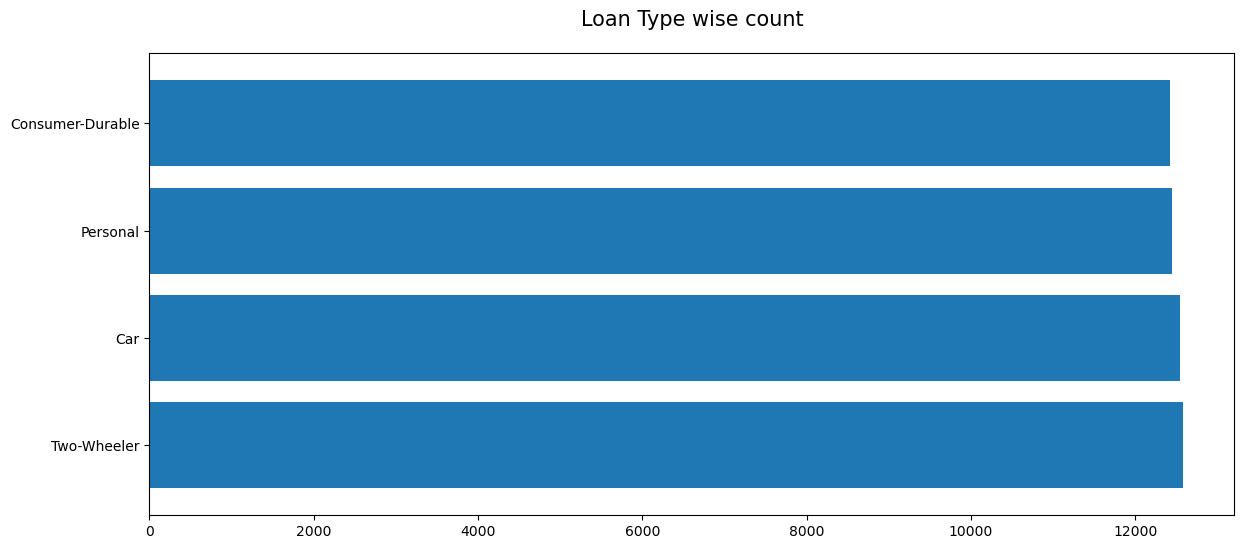

In [26]:
#Univariate Analysis
plt.figure(figsize = [14,6])
final_data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Loan Type wise count", fontdict={"fontsize":15}, pad =20)
plt.show()

#Plotting all the muneric variables - so creating a function which can be called

In [27]:
def univariate_for_numeric(df, col):
    sns.set(style='whitegrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=col, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col].dropna()).set(title='Distplot')
    plt.show()

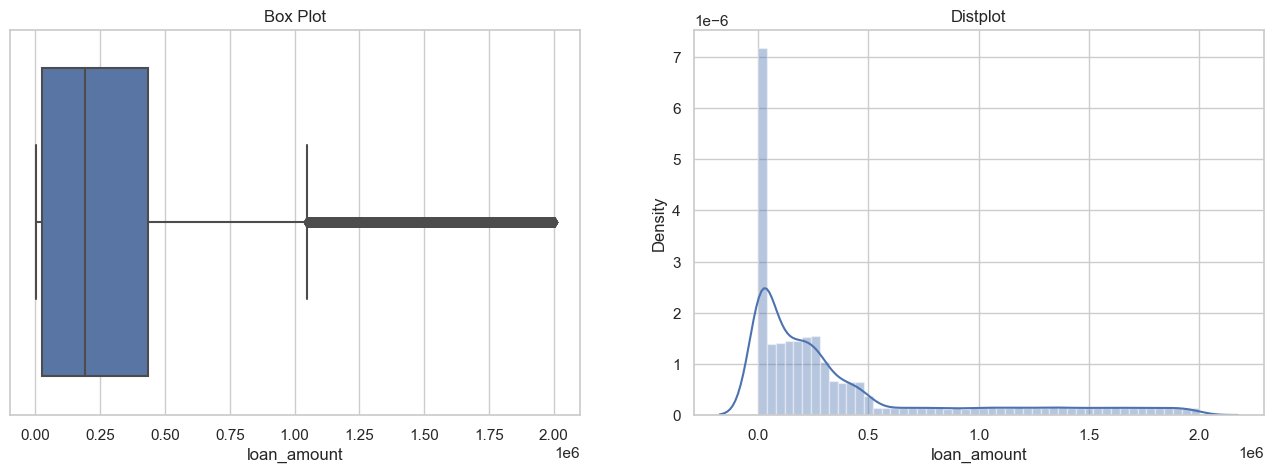

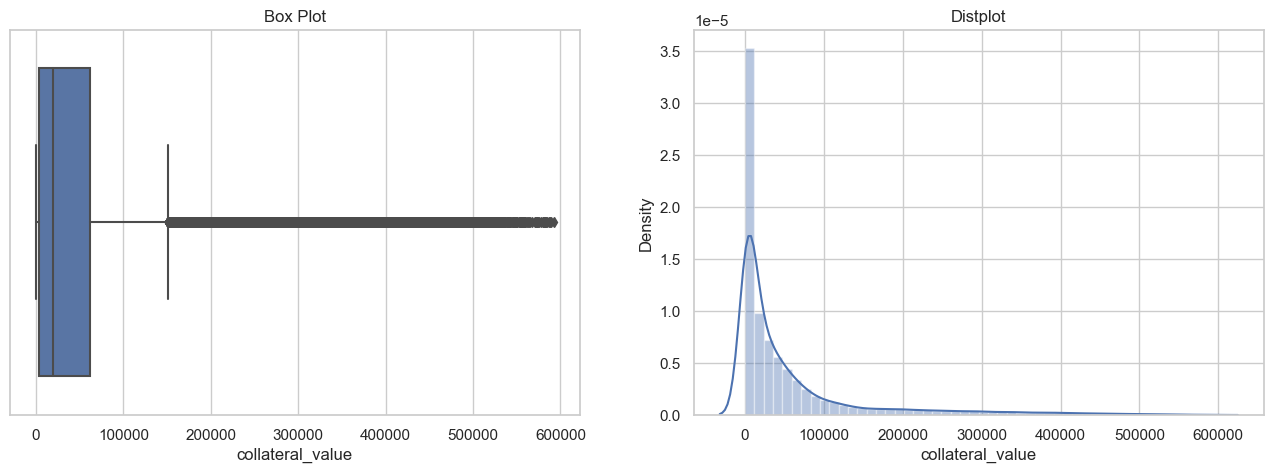

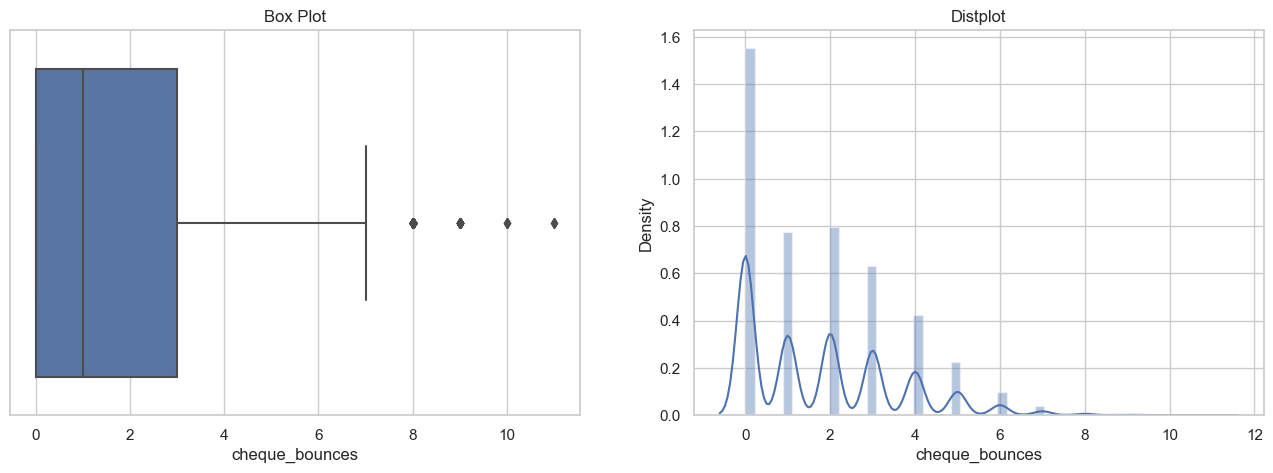

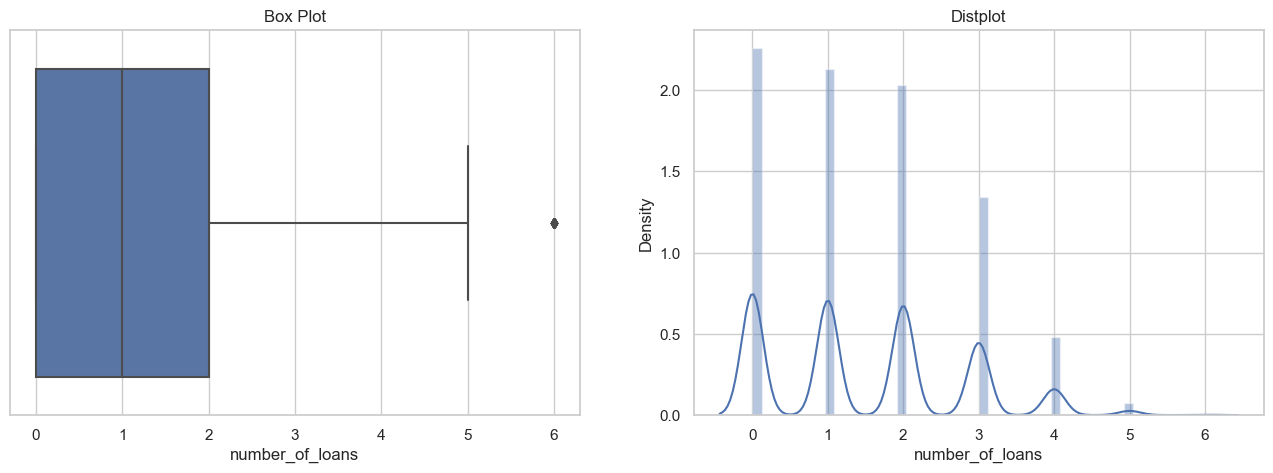

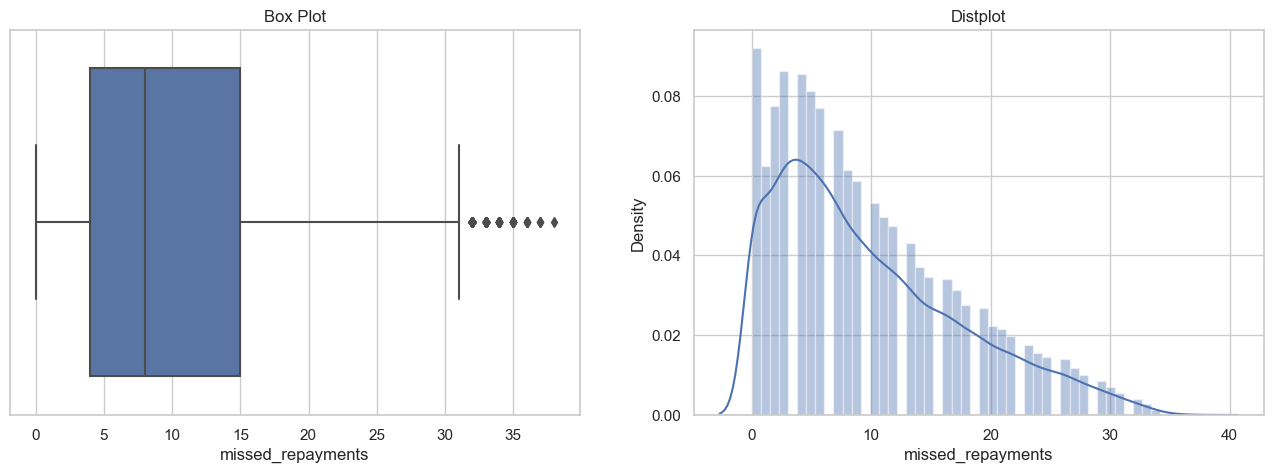

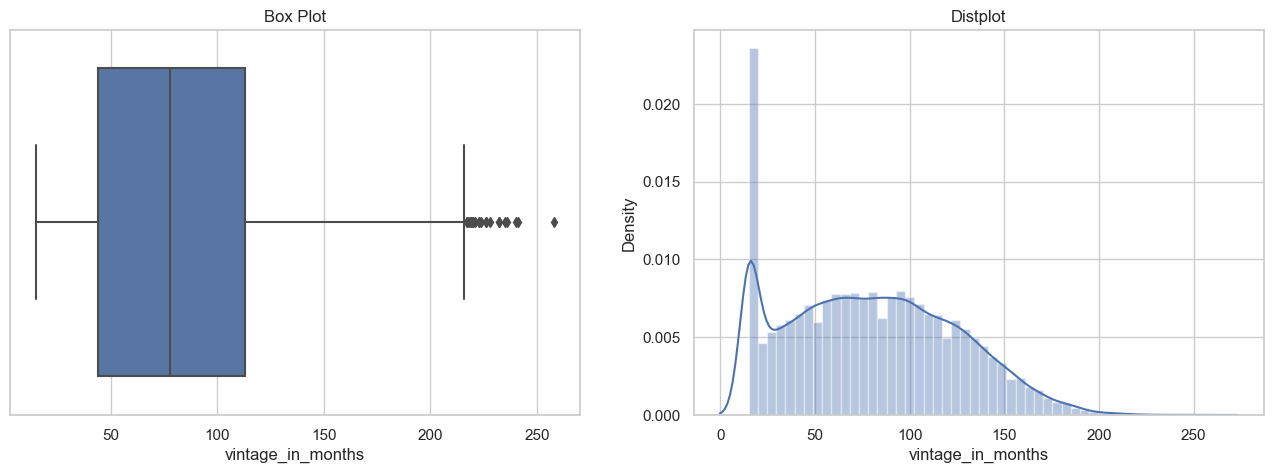

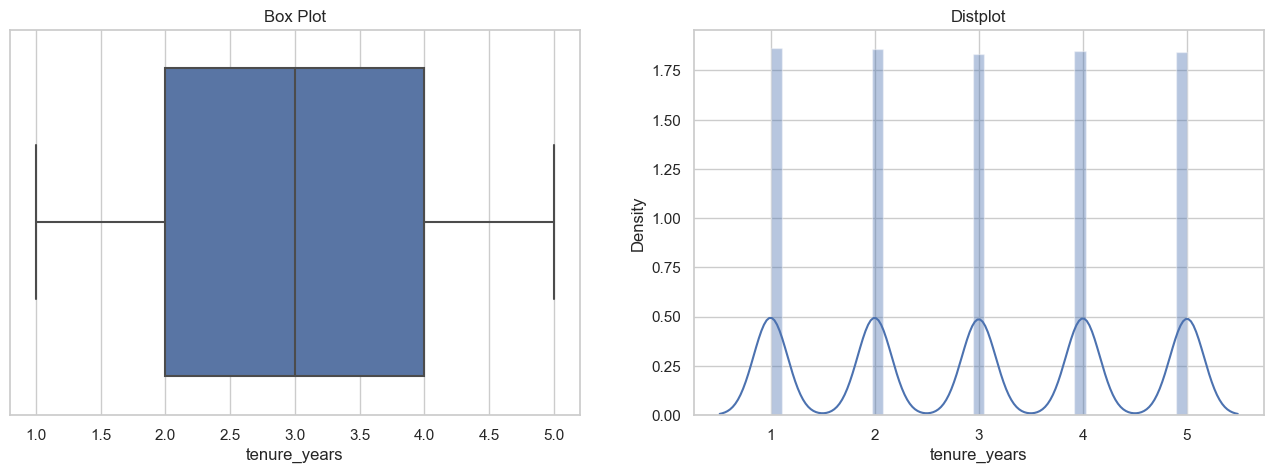

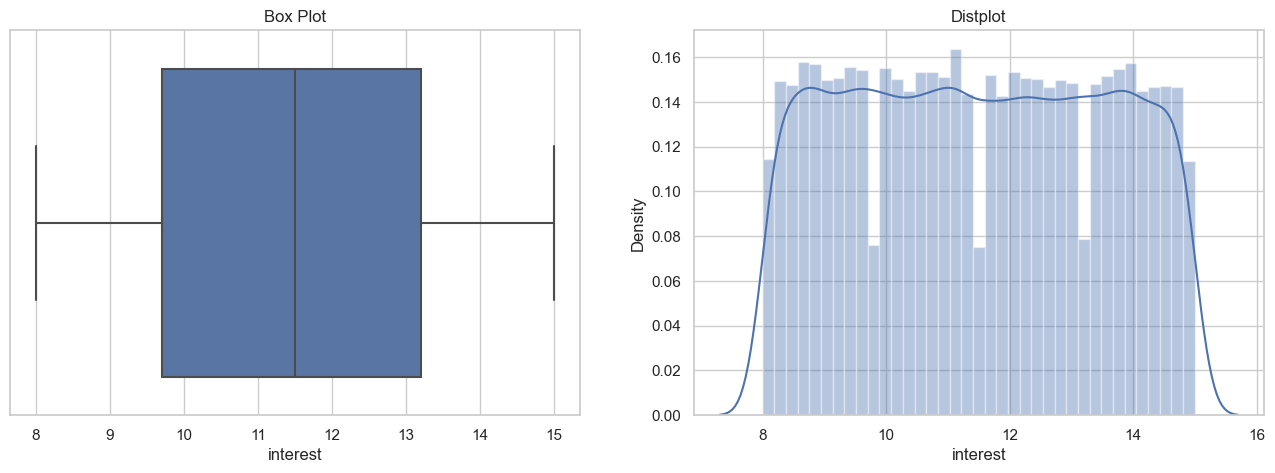

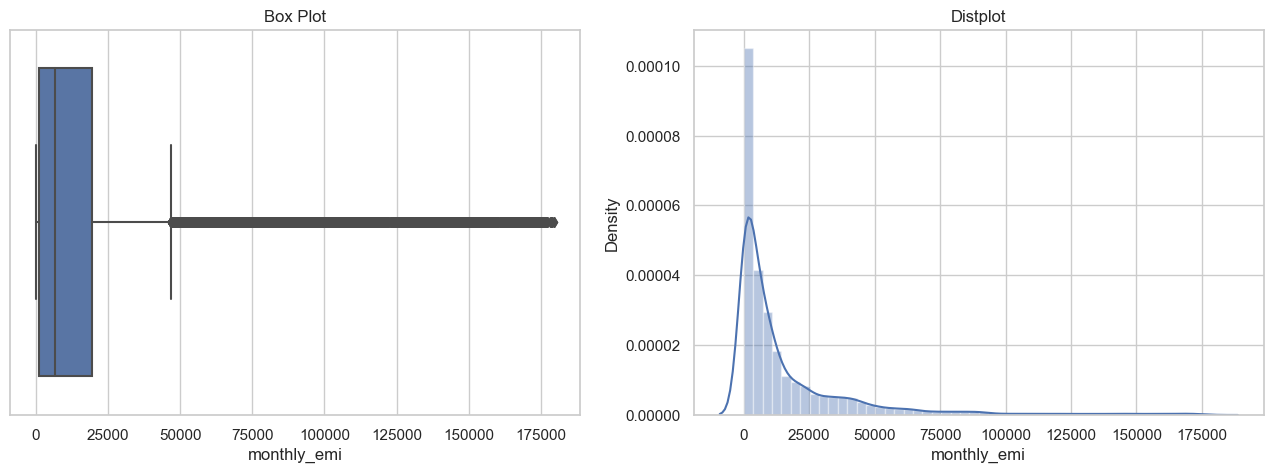

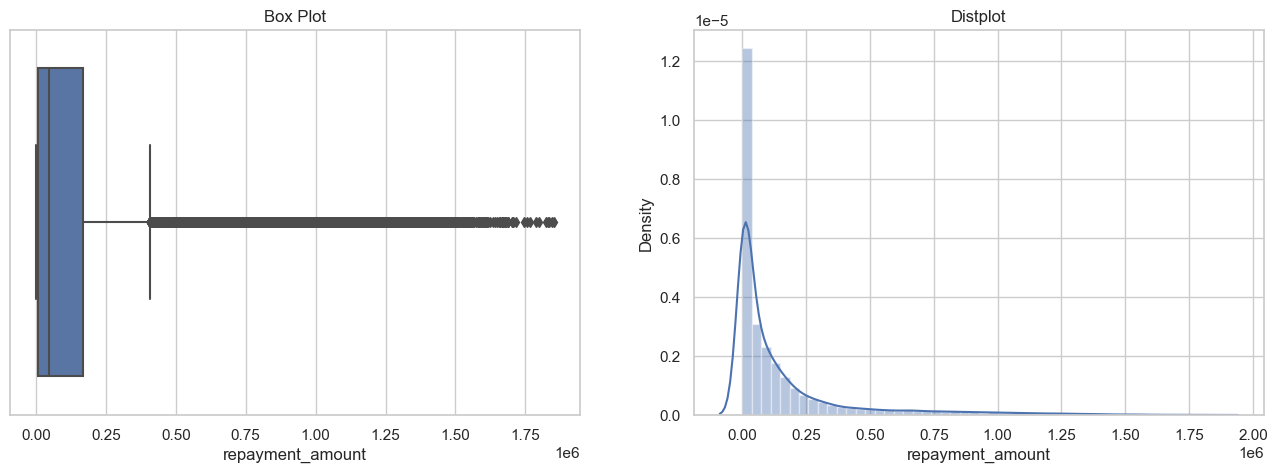

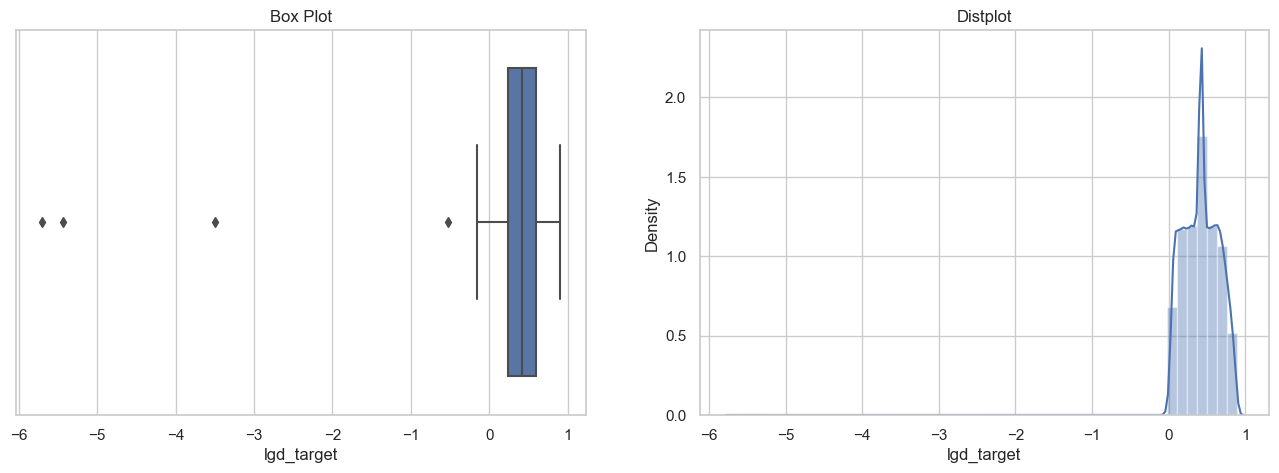

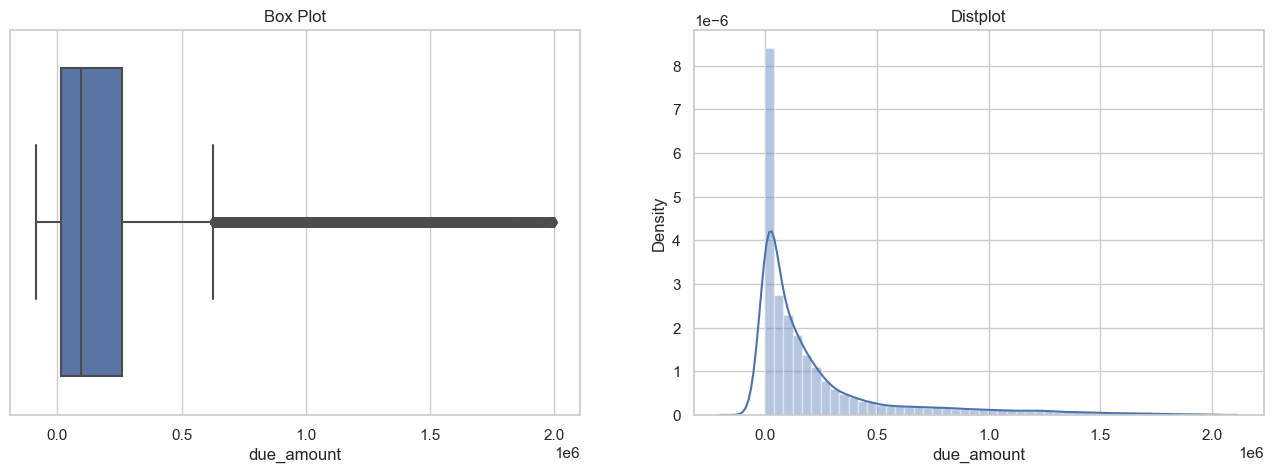

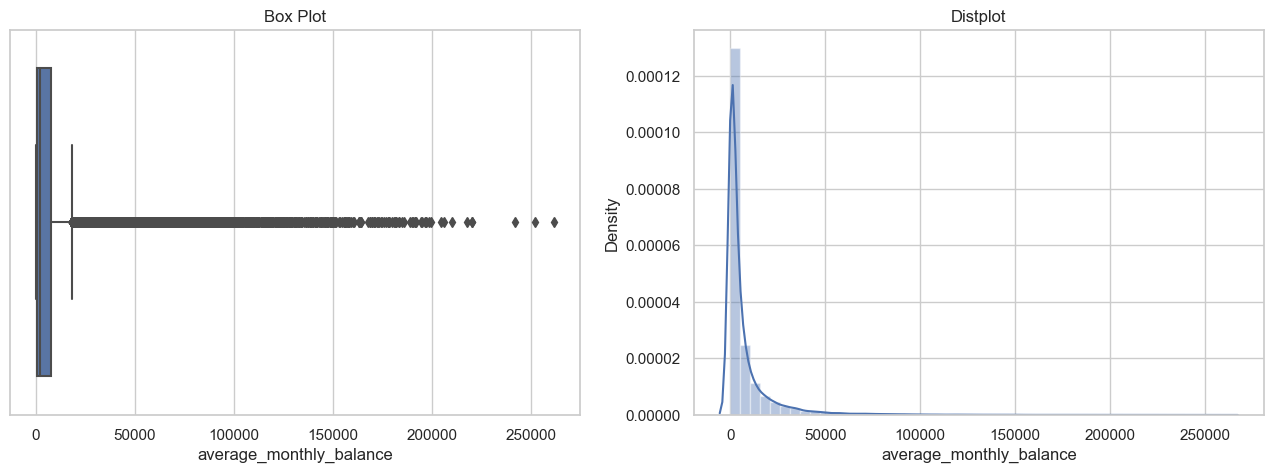

In [30]:
#Numerical columns
for i in final_data_num:
    univariate_for_numeric(final_data,i)

In [172]:
import warnings

warnings.filterwarnings('ignore')

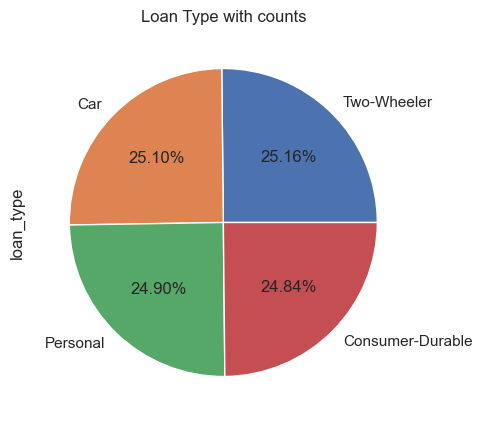

In [34]:
#lets check the loan counts using pie chart which will give better visualization

plt.figure(figsize = (5,5))
final_data.loan_type.value_counts().plot(kind='pie',autopct='%1.2f%%').set_title("Loan Type with counts")
plt.show()

Observation - 
1. Two wheeler loan number is maximum
2. Car loans are maximum

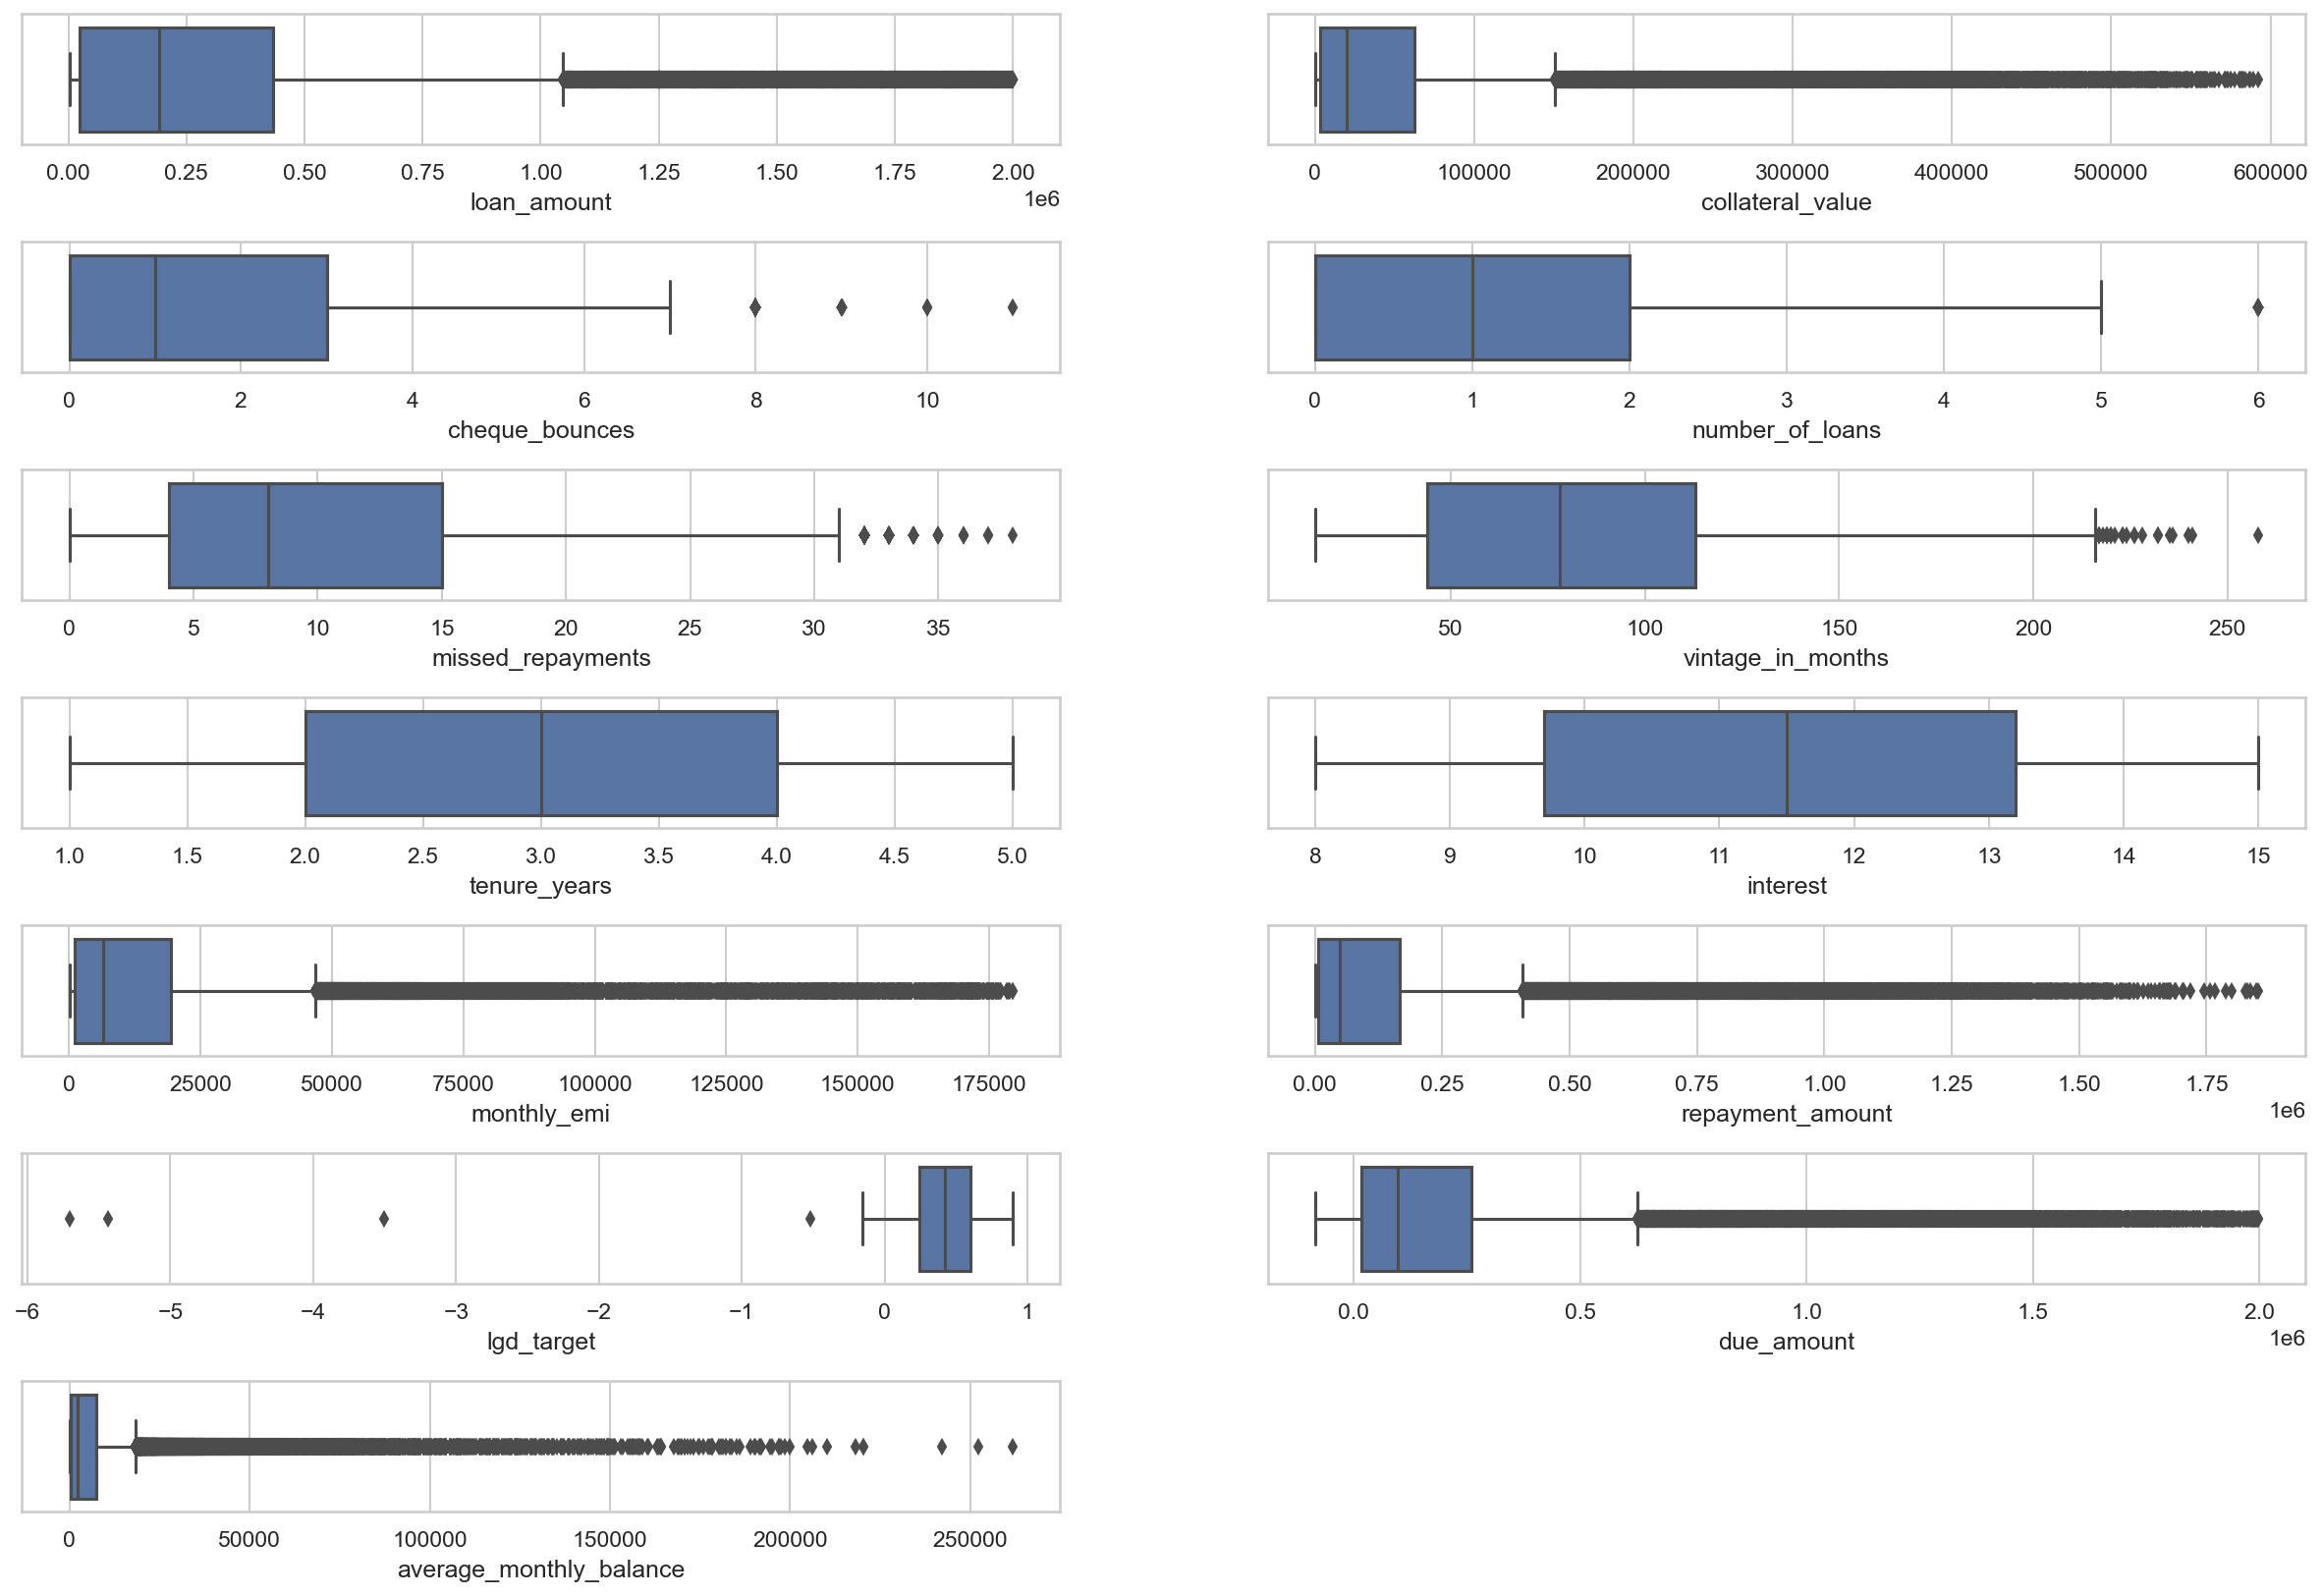

In [36]:
#create box plots for numberic columns

plt.figure(figsize = (20,200), dpi=150) 
for i in enumerate(final_data_num):  
    plt.subplot(100, 2, i[0]+1) 
    plt.subplots_adjust(hspace=0.75)
    sns.boxplot(x = i[1], data = final_data)

1. Huge number of outliers exits in Monthly EMI, Due Amount, Repayment Amount and Average monthly balances. These will be expected in bank transactions. 
2. Customers have taken maximum 2 consecutive loans.
3. Tenure of loans range between 2 to 4 years.
4. Very less number of cheque which have bounced. 

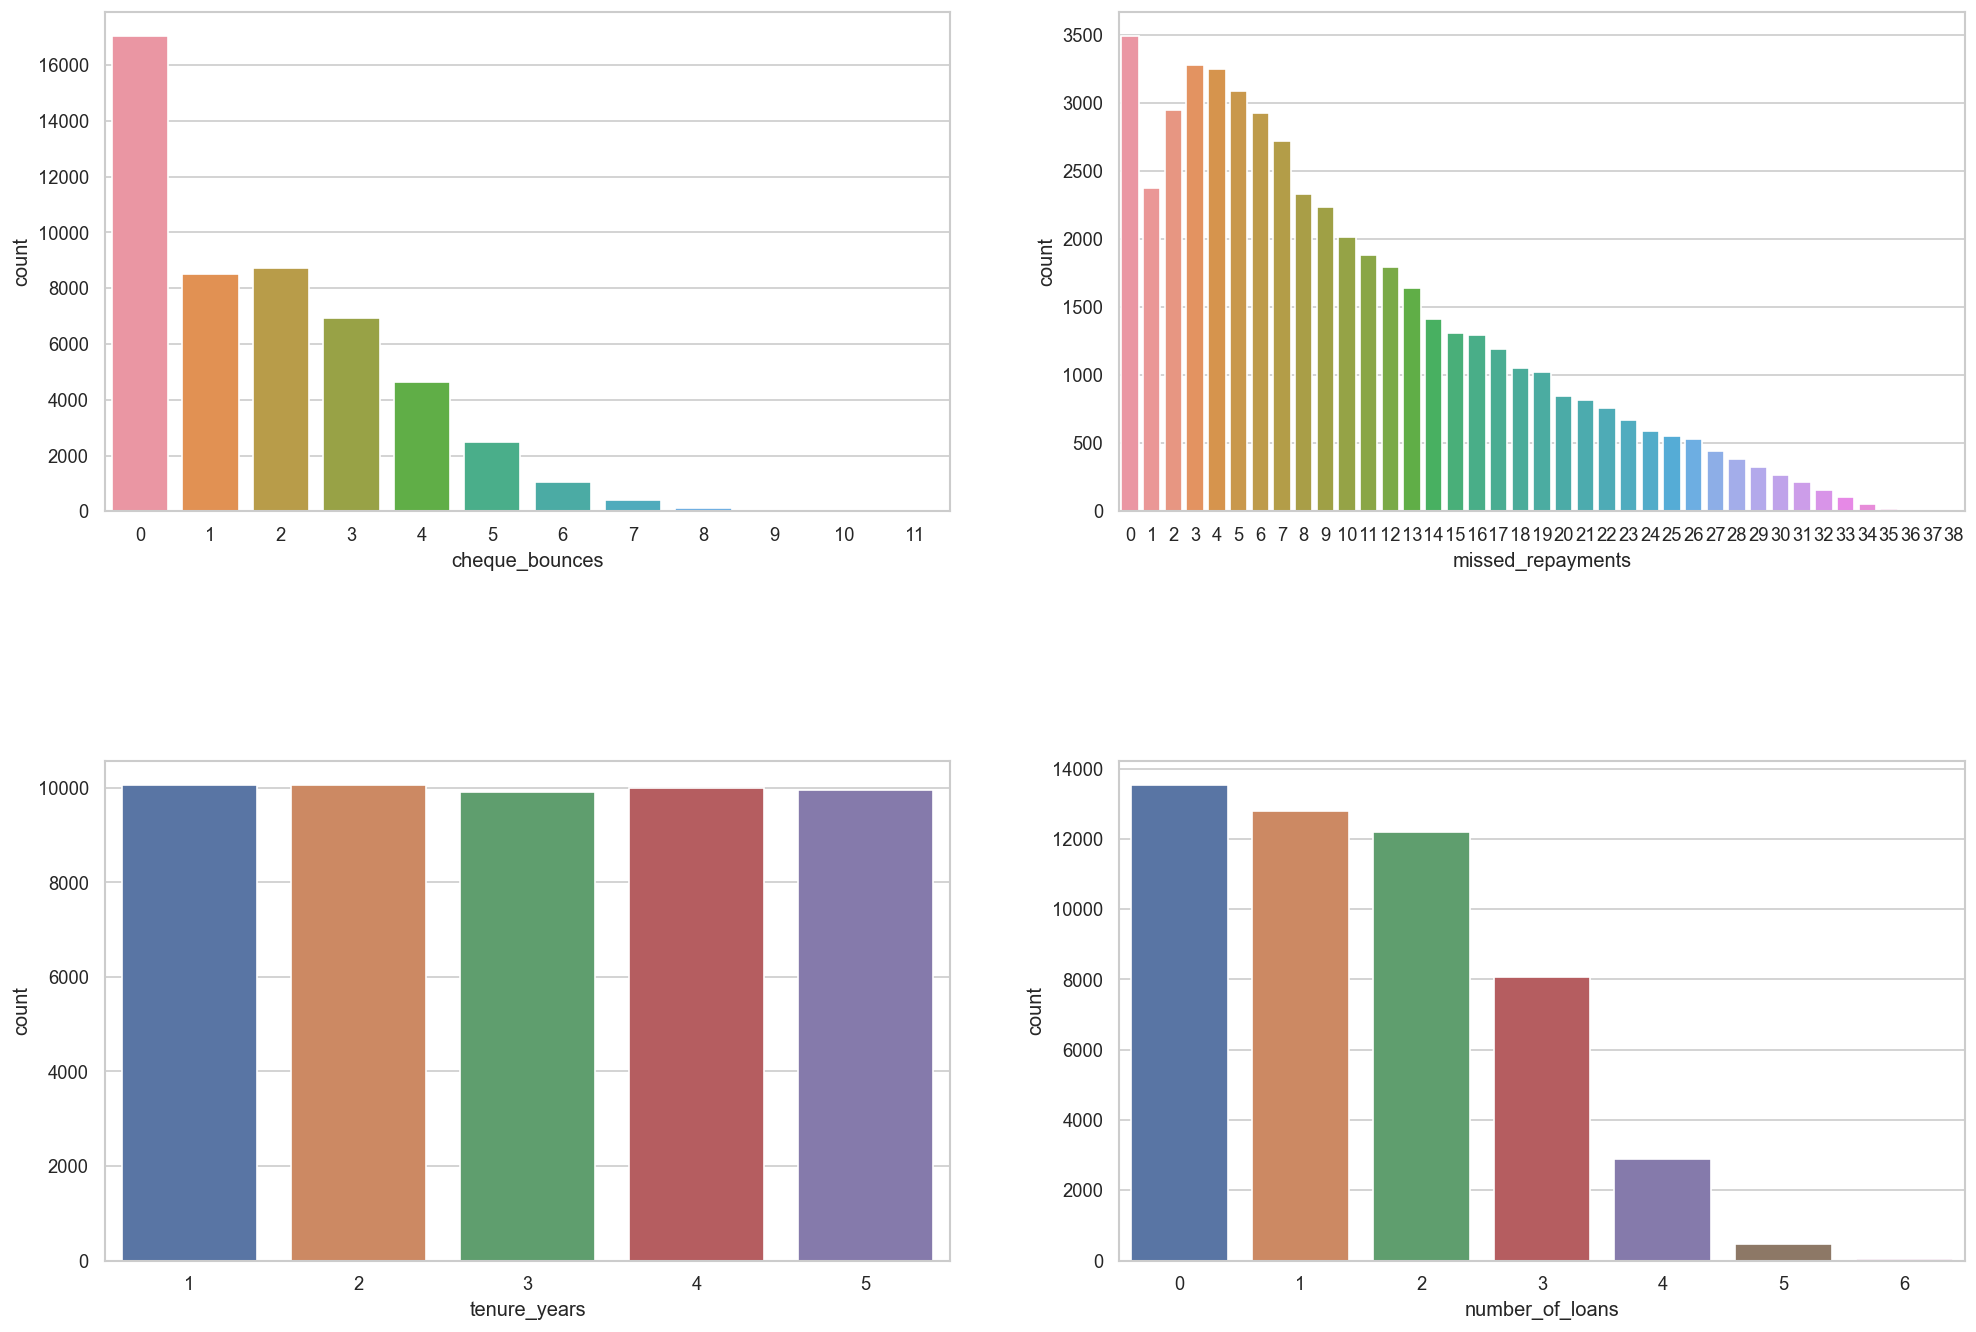

In [39]:
#plotting the barcharts to show obove informations more detailed way
dt= ['cheque_bounces','missed_repayments','tenure_years','number_of_loans']
plt.figure(figsize = (20,200), dpi=120) 
for i in enumerate(dt):  
    plt.subplot(25, 2, i[0]+1) 
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], data = final_data)

Bivariate analysis


Text(0.5, 1.0, 'Type of loans vs amounts')

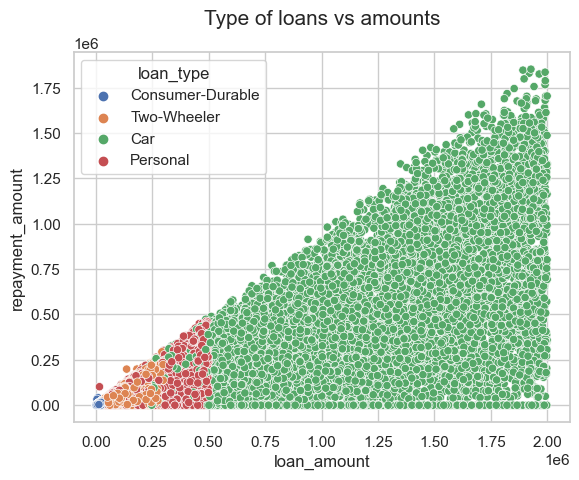

In [40]:
sns.scatterplot(x=final_data.loan_amount,
               y= final_data.repayment_amount,
               data=final_data, hue='loan_type')
plt.title('Type of loans vs amounts', fontdict={'fontsize' : 15}, pad=20)

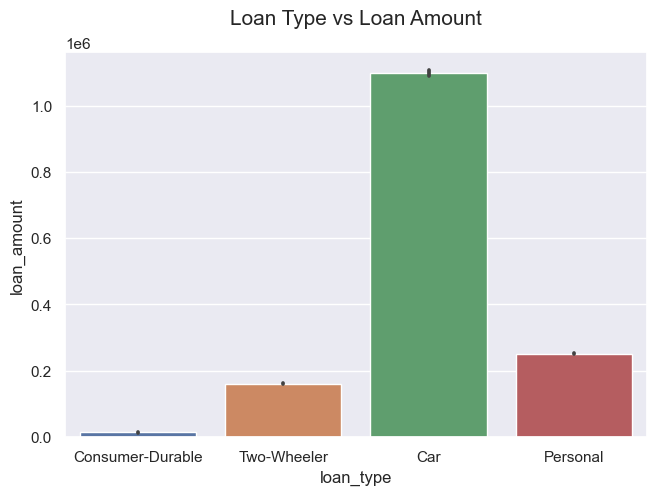

In [41]:
plt.figure(figsize=[7.5,5])
sns.set(style='darkgrid')
sns.barplot(x=final_data.loan_type,y= final_data.loan_amount)
plt.title('Loan Type vs Loan Amount', fontdict={'fontsize' : 15}, pad=20)
plt.show()

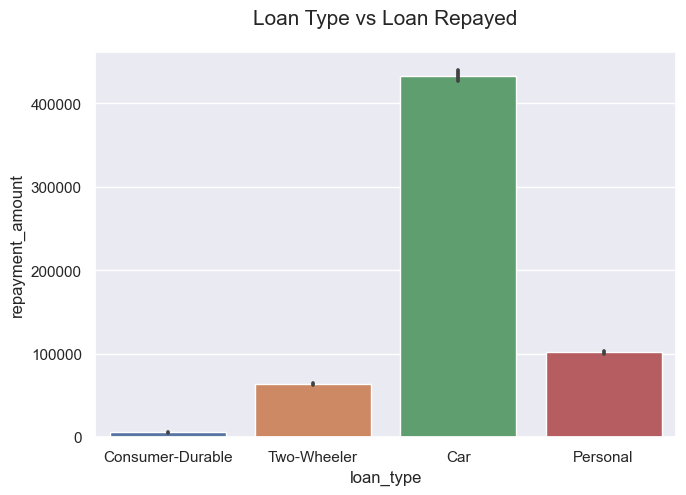

In [43]:
plt.figure(figsize=[7.5,5])
sns.set(style='darkgrid')
sns.barplot(x=final_data.loan_type,y= final_data.repayment_amount)
plt.title('Loan Type vs Loan Repaid', fontdict={'fontsize' : 15}, pad=20)
plt.show()

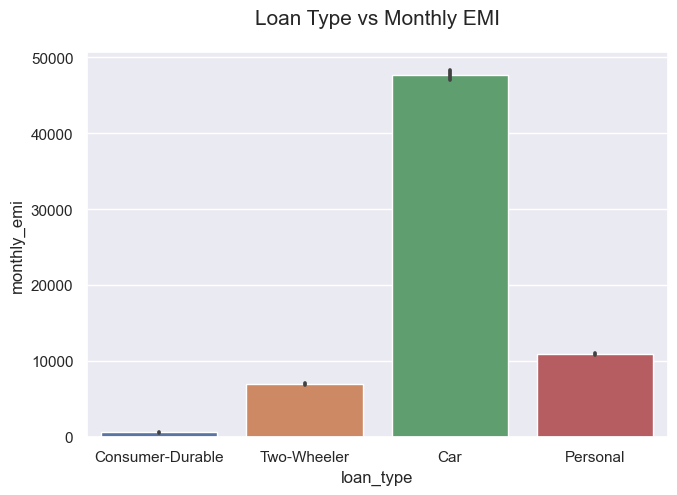

In [44]:
plt.figure(figsize=[7.5,5])
sns.set(style='darkgrid')
sns.barplot(x= final_data.loan_type,y= final_data.monthly_emi)
plt.title('Loan Type vs Monthly EMI', fontdict={'fontsize' : 15}, pad=20)
plt.show()

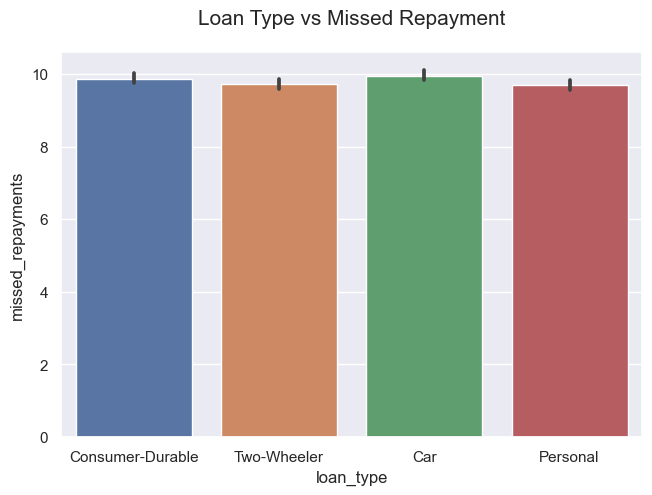

In [46]:
plt.figure(figsize = [7.5,5])
sns.set(style='darkgrid')
sns.barplot(x = final_data.loan_type,y = final_data.missed_repayments)
plt.title('Loan Type vs Missed Repayment', fontdict={'fontsize' : 15}, pad=20)
plt.show()

Missed repayments are almost same number thoughout all loan types

<Axes: >

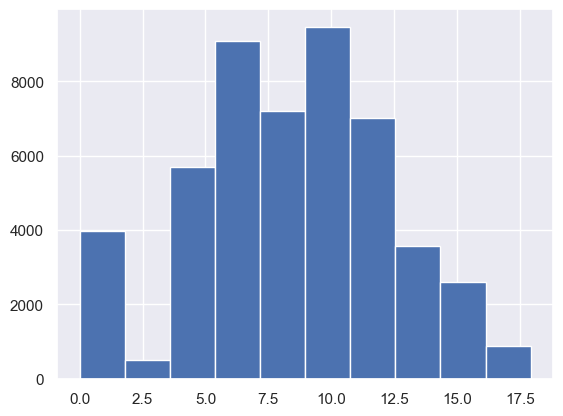

In [47]:
#Lets see if the values are normally distributed 

(final_data['repayment_amount']**(1/5)).hist()

<Axes: >

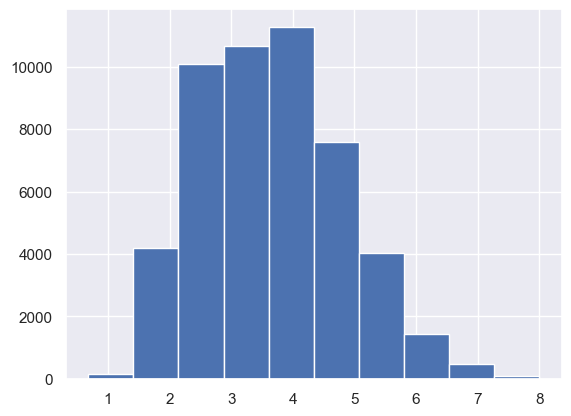

In [48]:
(final_data['average_monthly_balance']**(1/6)).hist()

As part of transformation lets transform all into Normal distribution

In [173]:
final_data['loan_amount']= final_data['loan_amount']**(1/5)
final_data['collateral_value']= final_data['collateral_value']**(1/5)
final_data['cheque_bounces']= final_data['cheque_bounces']**(1/2)
final_data['missed_repayments']= final_data['missed_repayments']**(1/2)
final_data['vintage_in_months']= final_data['vintage_in_months']**(1/2)
final_data['monthly_emi']= final_data['monthly_emi']**(1/6)
final_data['repayment_amount']= final_data['repayment_amount']**(1/5)
final_data['average_monthly_balance']= final_data['average_monthly_balance']**(1/6)

In [174]:
final_test_data['collateral_value'] = final_test_data['collateral_value']**(1/5)
final_test_data['cheque_bounces'] = final_test_data['cheque_bounces']**(1/2)
final_test_data['missed_repayments'] = final_test_data['missed_repayments']**(1/2)
final_test_data['vintage_in_months'] = final_test_data['vintage_in_months']**(1/2)
final_test_data['monthly_emi'] = final_test_data['monthly_emi']**(1/6)
final_test_data['repayment_amount'] = final_test_data['repayment_amount']**(1/5)
final_test_data['average_monthly_balance'] = final_test_data['average_monthly_balance']**(1/6)

<Axes: >

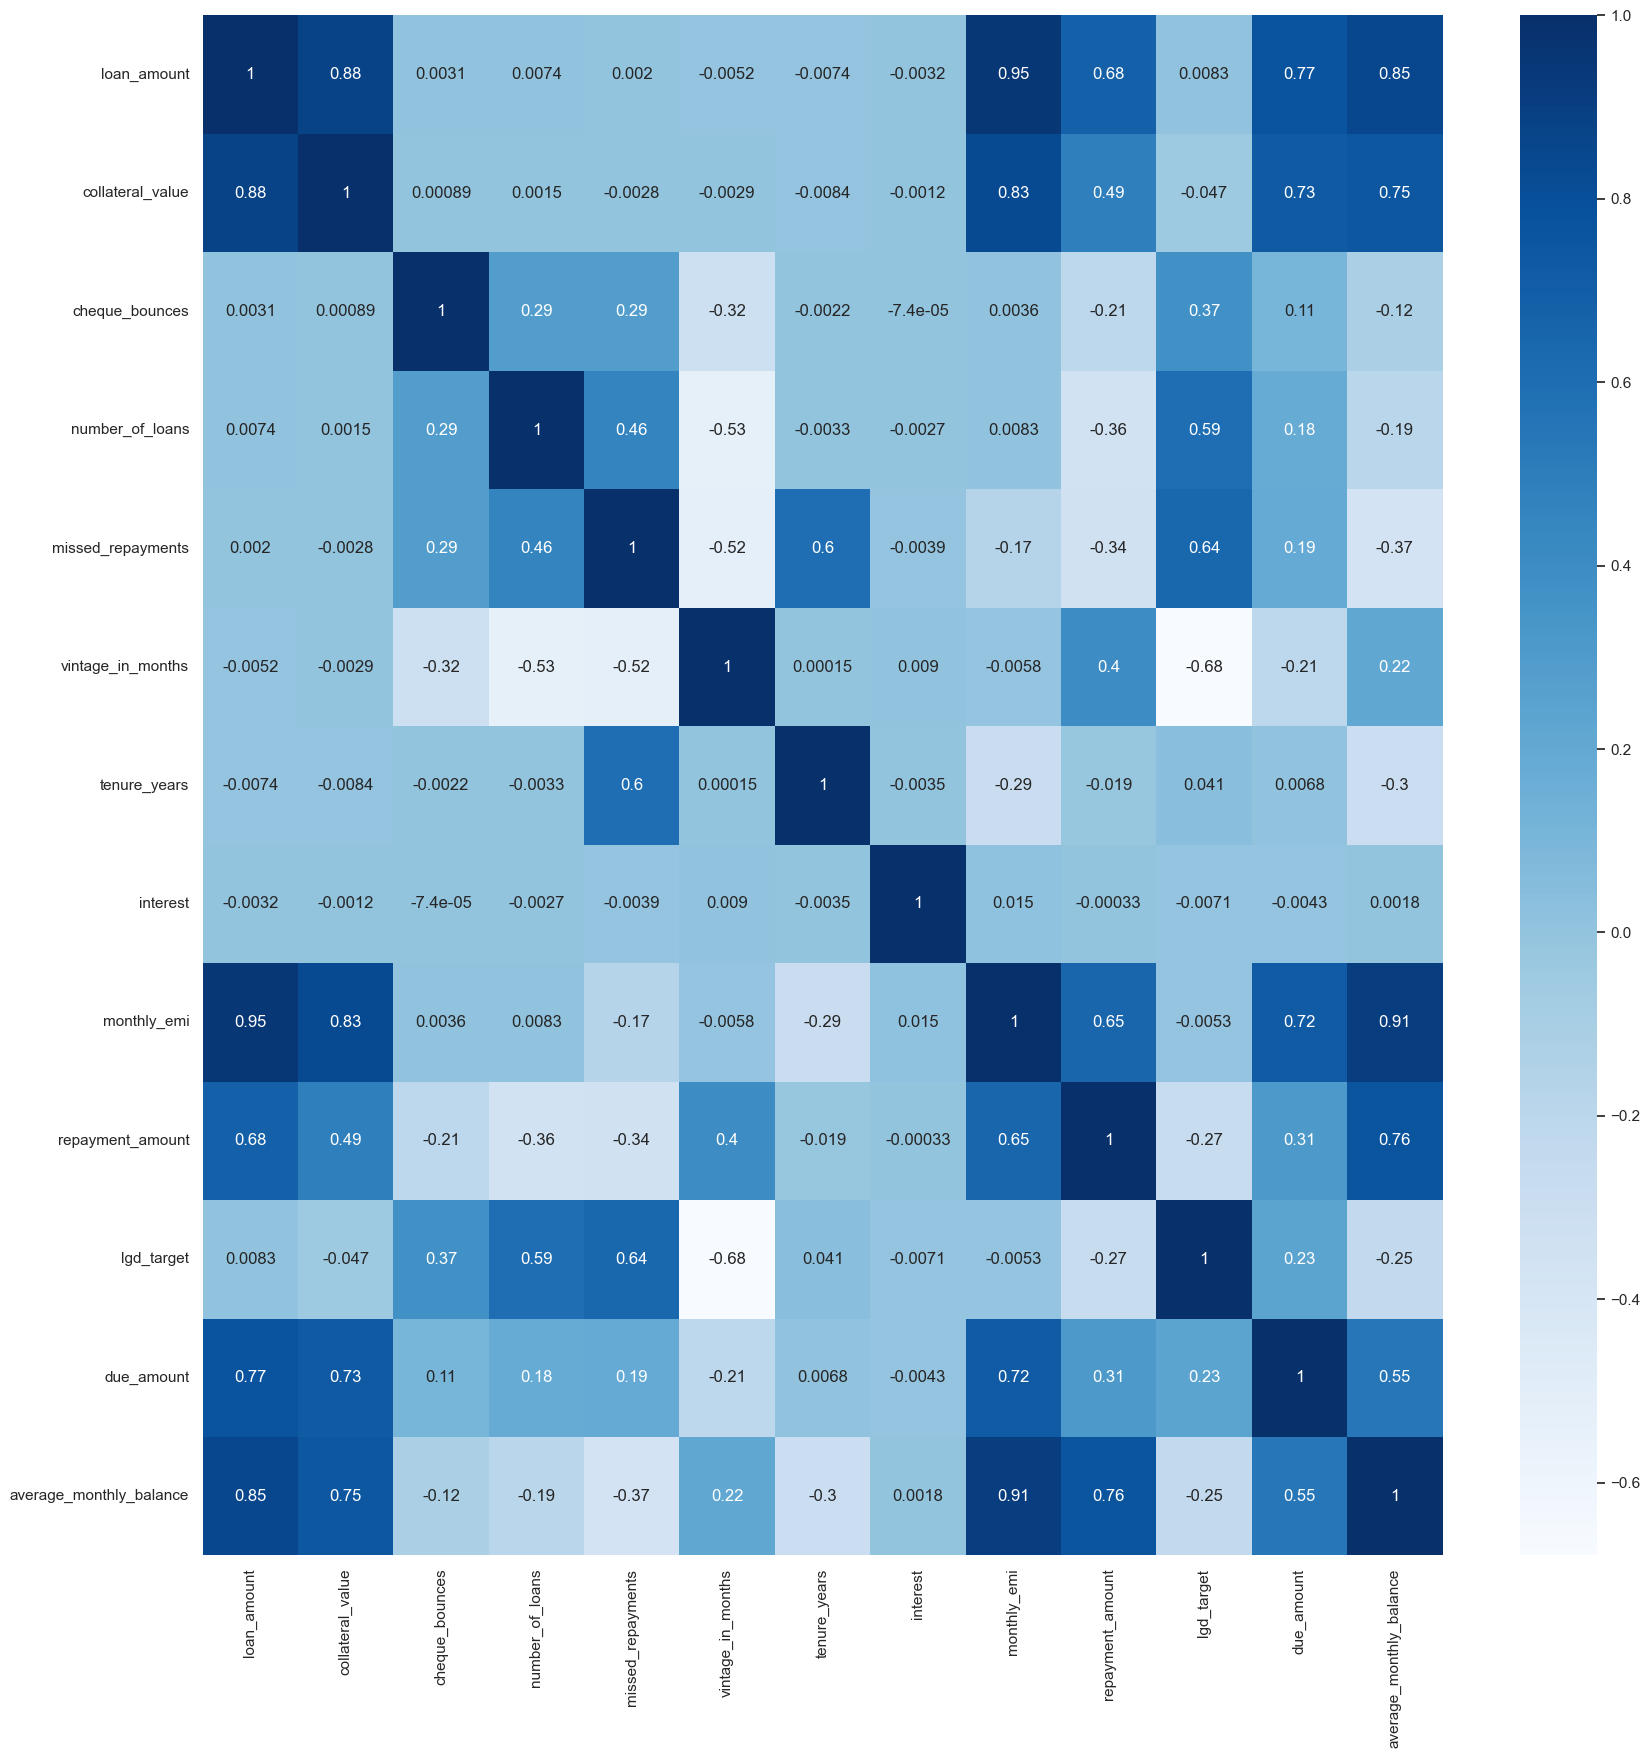

In [53]:
#Lets check the correlation between the features


import seaborn as sns
plt.figure(figsize = (20,20))

corr= final_data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

In [175]:
sys_time= pd.to_datetime('now')

In [30]:
sys_time

Timestamp('2024-04-29 01:59:57.582672')

In [176]:
#getting the date feature 
final_data['default_date_diff']= (sys_time-final_data['default_date'])/np.timedelta64(1, "D")
final_test_data['default_date_diff'] = (sys_time-final_test_data['default_date'])/np.timedelta64(1,'D')

In [177]:
#Droping the columns as we faced some issues ahead. So starting from this place again
final_data= final_data.drop(['disbursal_date', 'default_date', 'loan_acc_num', 'customer_name', 'customer_address'],1)
final_test_data = final_test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

In [178]:
loan_type_encoded=pd.get_dummies(final_data['loan_type'], drop_first=True)

In [179]:
test_loan_type_encoded = pd.get_dummies(final_test_data['loan_type'],drop_first=True)

In [113]:
loan_type_encoded.head()

,Consumer-Durable,Personal,Two-Wheeler
0,1,0,0
1,0,0,1
2,0,0,0
3,0,0,1
4,1,0,0


In [180]:
final_data=final_data.drop(['loan_type'], axis=1)
final_test_data = final_test_data.drop(['loan_type'],axis=1)

In [181]:
final_data= pd.concat([final_data,loan_type_encoded], axis=1)
final_test_data= pd.concat([final_test_data,test_loan_type_encoded], axis=1)

In [ ]:
# Train - Test Split for model building

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import *
from  sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [183]:
x= final_data.drop(columns=['lgd_target'])
Y= final_data[['lgd_target']]
x_train, x_test, Y_train, Y_test= train_test_split(x, Y, test_size=0.3, random_state=42)

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [120]:
!pip install scikit-learn
import sklearn as sklearn

In [185]:
#Scaling
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
#we will go above and drop these some columns as those will not be needed and might create such issue. 
Adding the drop statement above and building the Train Test model again.

In [186]:
unseen_data = sc.fit_transform(final_test_data)

Instead of manual feature elemination lets implement automated feature elemination (Recursive Feature elemination)

In [187]:
#RFE setting feature limit to 10
lm= LinearRegression()
lm.fit(x_train, Y_train)
rfe=RFE(lm, n_features_to_select=10)
rfe= rfe.fit(x_train, Y_train)

In [45]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [47]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False])

In [48]:
rfe.ranking_

array([1, 4, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 7, 5, 2, 3])

In [188]:
#fetching R2 value

Y_predict= rfe.predict(x_test)
metrics.r2_score(Y_test, Y_predict)

0.7391982510473446

In [189]:
lm= LinearRegression()
lm.fit(x_train, Y_train)

Y_predict=lm.predict(x_test)
metrics.r2_score(Y_test, Y_predict)

0.7430029216741423

Gradient Method


In [190]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

#Evaluation of hyperparameters in GradientRegressor
hypr_param={'n_estimators' :500, "max_depth": 4,'min_samples_split': 4,'learning_rate': 0.01,'loss': 'squared_error'}

gradient_reg= GradientBoostingRegressor (**hypr_param)


gradient_reg.fit(x_train, Y_train)
Y_predict2= gradient_reg.predict(x_test)
print('R squared : %.3f' %gradient_reg.score (x_test, Y_test))

R squared : 0.875


In [191]:
Y_predict2_train= gradient_reg.predict(x_train)

print('R2 for train dataset:' , r2_score(Y_train, Y_predict2_train))

R2 for train dataset: 0.9039018211997131


In [192]:
Y_predict2_test= gradient_reg.predict(x_test)

print('R2 for test dataset:' , r2_score(Y_test, Y_predict2_test))

R2 for test dataset: 0.8749108471633739


[9.24338232e-06 8.64403542e-03 5.72207671e-03 8.75506859e-02
 2.25275196e-01 4.40937776e-01 5.56201171e-02 1.79297894e-06
 3.05334077e-03 1.02103414e-01 7.06427315e-02 4.22161878e-04
 1.65968293e-05 0.00000000e+00 8.31198808e-07 0.00000000e+00]


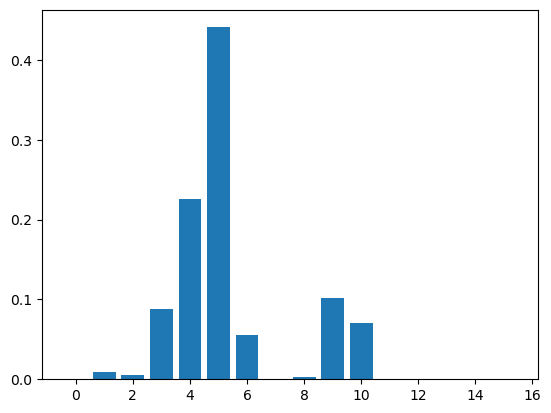

In [129]:
print(gradient_reg.feature_importances_)
plt.bar(range(len(gradient_reg.feature_importances_)), gradient_reg.feature_importances_)
plt.show()

Shows the importance of features

<Axes: >

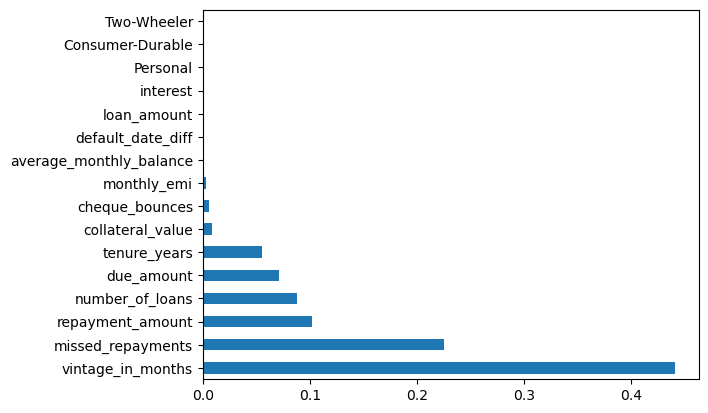

In [130]:
list_features= pd.Series(gradient_reg.feature_importances_, index= x.columns)
list_features.nlargest(20).plot(kind='barh')

Random Forest method

In [131]:
random_forest_reg= RandomForestRegressor(bootstrap= True, n_estimators= 200, random_state=42, max_depth=4, max_features=None, min_samples_leaf=2)
random_forest_reg.fit(x_train, Y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [132]:
Y_predict3_train= random_forest_reg.predict(x_train)
print(r2_score(Y_train, Y_predict3_train))

0.7110836631862656


In [133]:
Y_predict3_test= random_forest_reg.predict(x_test)
print(r2_score(Y_test, Y_predict3_test))

0.6963126682189684


Verifying Extreme Gradient Boost

In [193]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [65]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [194]:
reg_model = XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

r_square = cross_val_score(reg_model, x_train, Y_train, scoring='r2', cv=cv, n_jobs=-1)

r_square = absolute(r_square)
print('R2 %.2f (%.2f)' % (r_square.mean(), r_square.std()) )

R2 0.96 (0.05)


In [195]:
#on test model 
r_square_test = cross_val_score(reg_model, x_test, Y_test, scoring='r2', cv=cv, n_jobs=-1)

r_square_test = absolute(r_square_test)
print('R2 %.2f (%.2f)' % (r_square_test.mean(), r_square_test.std()) )

R2 0.94 (0.08)


In [196]:
Extreme_RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [197]:
Extreme_Grad_Regression=Extreme_RegModel.fit(x_train,Y_train)
Y_predict4_train=Extreme_Grad_Regression.predict(x_train)
print("R2 for train dataset:", r2_score(Y_train, Y_predict4_train))
Y_predict4_test=Extreme_Grad_Regression.predict(x_test)
print("R2 for test dataset:", r2_score(Y_test, Y_predict4_test))

R2 for train dataset: 0.8946439076265167
R2 for test dataset: 0.8562130735291698


Best R2 is seen with Extreme Gradient Boost hence going ahead with that model

In [198]:
final_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'lgd_target', 'due_amount',
       'average_monthly_balance', 'default_date_diff', 'Consumer-Durable',
       'Personal', 'Two-Wheeler'],
      dtype='object')

In [199]:
final_test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due_amount',
       'average_monthly_balance', 'default_date_diff', 'Consumer-Durable',
       'Personal', 'Two-Wheeler'],
      dtype='object')

In [73]:
final_test_data = sc.fit_transform(final_test_data)

In [75]:
final_test_data = pd.DataFrame(final_test_data)

In [76]:
final_test_data.columns =['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due_amount',
       'average_monthly_balance', 'default_date_diff', 'Consumer-Durable',
       'Personal', 'Two-Wheeler']

In [200]:
final_model = Extreme_RegModel.predict(unseen_data)
final_model_pred = pd.Series(final_model)

In [201]:
copy_final_test_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'repayment_amount',
       'due_amount', 'average_monthly_balance'],
      dtype='object')

In [202]:
concat_ID_prediction = pd.DataFrame({'id':copy_final_test_data['loan_acc_num'].values, 'LGD':final_model_pred.values})

In [203]:
concat_ID_prediction.sample(15)

,id,LGD
3239,LN35340648,0.122225
1719,LN78744759,0.301966
2232,LN66190756,0.507030
1438,LN45430060,0.128278
5212,LN73433223,0.530429
4302,LN29646443,0.678277
3286,LN71439010,0.081186
2661,LN18798395,0.818544
6621,LN80853853,0.710702
5828,LN17688453,0.285270


In [204]:
#Extract this to an excel/csv where the team can take next actions of assessing the high LGD to focus on. Low LGD can be areas where there wont be credit loss

concat_ID_prediction.to_csv("LoanIDvsLGD.csv",index=False)